In [8]:
#pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical 

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

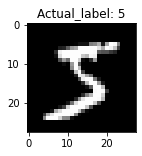

In [5]:
img_id=0
plt.figure(figsize=(2,2))
plt.imshow(x_train[img_id],cmap='gray')
plt.title(f"Actual_label: {y_train[img_id]}")
plt.show()

In [6]:
#Converting the dataset (60000,28,28) into a flatten array
x_train=x_train.reshape(60000,28*28)
x_test=x_test.reshape(10000,28*28)

In [7]:
# Applying Normalization
x_train= x_train/255
x_test= x_test/255

In [8]:
x_train.shape

(60000, 784)

In [9]:
x_test.shape

(10000, 784)

In [10]:
# Applying Hot-Code Encoding
y_train_ohe= to_categorical(y_train)
y_test_ohe= to_categorical(y_test)

# Building Neural Network

In [37]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.layers import LeakyReLU, ReLU, Dropout
from keras import optimizers

In [43]:
model= Sequential()
model.add(Dense(392,input_dim=784))
model.add(Dense(196,activation=LeakyReLU()))
model.add(Dropout(0.25))
model.add(Dense(98,activation=ReLU()))
model.add(BatchNormalization())
model.add(Dense(10,activation='Softmax')) # As it is Multiclass Clasification Problem

In [44]:
model.compile(optimizers.SGD(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
model.fit(x=x_train,
         y=y_train_ohe,
         batch_size=2000,
         epochs=40,
         validation_data=(x_test,y_test_ohe))          

Epoch 1/40
30/30 [==============================] - 2s 62ms/step - loss: 1.7213 - accuracy: 0.4508 - val_loss: 1.7211 - val_accuracy: 0.5747
Epoch 2/40
30/30 [==============================] - 2s 51ms/step - loss: 0.9267 - accuracy: 0.7182 - val_loss: 1.4203 - val_accuracy: 0.7704
Epoch 3/40
30/30 [==============================] - 2s 55ms/step - loss: 0.7234 - accuracy: 0.7858 - val_loss: 1.1955 - val_accuracy: 0.8394
Epoch 4/40
30/30 [==============================] - 2s 69ms/step - loss: 0.6247 - accuracy: 0.8178 - val_loss: 1.0072 - val_accuracy: 0.8672
Epoch 5/40
30/30 [==============================] - 2s 71ms/step - loss: 0.5583 - accuracy: 0.8381 - val_loss: 0.8540 - val_accuracy: 0.8782
Epoch 6/40
30/30 [==============================] - 2s 80ms/step - loss: 0.5167 - accuracy: 0.8496 - val_loss: 0.7254 - val_accuracy: 0.8897
Epoch 7/40
30/30 [==============================] - 2s 73ms/step - loss: 0.4824 - accuracy: 0.8619 - val_loss: 0.6194 - val_accuracy: 0.8955
Epoch 8/40
30

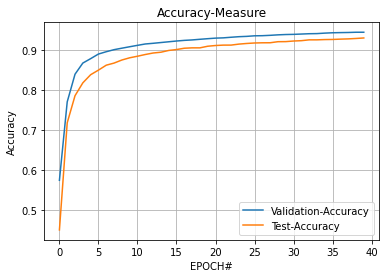

In [46]:
plt.plot(model.history.history['val_accuracy'])
plt.plot(model.history.history['accuracy'])
plt.legend(['Validation-Accuracy', 'Test-Accuracy'])
plt.title("Accuracy-Measure")
plt.xlabel("EPOCH#")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

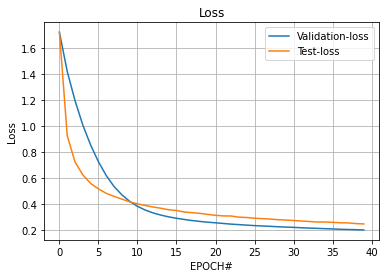

In [47]:
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])
plt.legend(['Validation-loss', 'Test-loss'])
plt.title("Loss")
plt.xlabel("EPOCH#")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Prediction

In [48]:
import numpy as np

In [49]:
x_test[660].reshape(-1,784).shape

(1, 784)

In [51]:
pred=model.predict(x_test[660].reshape(-1,784))

1/1 [==============================] - 0s 85ms/step


In [52]:
pred

array([[6.2164688e-04, 1.2591849e-04, 1.7028341e-02, 1.3360652e-04,
        9.7853082e-01, 4.4047221e-04, 1.2976278e-03, 8.4453676e-04,
        7.4575000e-05, 9.0247759e-04]], dtype=float32)

In [53]:
np.argmax(pred)

4

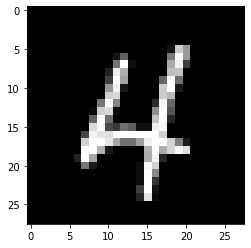

In [54]:
plt.imshow(x_test[660].reshape(28,28),cmap='gray')
plt.show()